In [510]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [511]:
df = pd.read_csv('hotel_bookings_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [512]:
cat = df.select_dtypes(include='object')
num = df.drop(columns=cat.columns)

In [513]:
df.shape

(119390, 29)

# Exploratory Data Analysis

# Preprocessing

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [515]:
cat.describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


In [516]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Handling Missing Values

In [517]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [518]:
df['children'].fillna(0, inplace= True)
df['city'].fillna(df['city'].mode()[0], inplace= True)
df['agent'].fillna(0, inplace= True)
df['company'].fillna(0, inplace= True)

## Handling Invalid Values

In [519]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [520]:
df['meal'].replace('Undefined','No Meal',inplace=True)

## Handling Unnecessary Data

In [521]:
df['Total Customer'] = df['adults'] + df['children'] + df['babies']
df = df.drop(df[df['Total Customer'] == 0].index)

## Handling Type Data

In [522]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

# Exploratory Data Analysis

## Monthly Hotel Booking Analysis Based on Hotel Type

In [523]:
df.shape

(119210, 30)

In [524]:
def month_name_to_number(df, month_col):
  month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

  df[month_col] = df[month_col].map(lambda x: month_numbers[month_names.index(x)])

  return df

def number_to_month(df, month_col):
  month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

  df[month_col] = df[month_col].map(lambda x: month_names[month_numbers.index(x)])

  return df

In [525]:
x = df.groupby(['hotel','arrival_date_year','arrival_date_month']).aggregate({'is_canceled':'count'}).rename(columns={'is_canceled':'total'}).reset_index()
x = month_name_to_number(x, 'arrival_date_month').sort_values(['hotel','arrival_date_year','arrival_date_month'])
x = number_to_month(x, 'arrival_date_month')
x

,hotel,arrival_date_year,arrival_date_month,total
2,City Hotel,2017,January,1233
1,City Hotel,2017,February,1649
5,City Hotel,2017,September,1396
4,City Hotel,2017,October,2474
3,City Hotel,2017,November,3524
0,City Hotel,2017,December,3382
10,City Hotel,2018,January,3103
9,City Hotel,2018,February,2465
13,City Hotel,2018,March,1364
6,City Hotel,2018,April,2365


In [526]:

df['arrival_date_year'] = df['arrival_date_year'].replace(2019,2017)

dfg = df.groupby(['hotel','arrival_date_month','arrival_date_year']).aggregate({'Total Customer' : 'count'}).reset_index()

dfg = dfg.groupby(['hotel','arrival_date_month']).aggregate({'Total Customer' : 'mean'}).reset_index()


dfg = month_name_to_number(dfg, 'arrival_date_month').sort_values(['hotel','arrival_date_month'])
dfg = number_to_month(dfg, 'arrival_date_month')
dfg

,hotel,arrival_date_month,Total Customer
4,City Hotel,January,2168.0
3,City Hotel,February,2057.0
7,City Hotel,March,1865.0
0,City Hotel,April,2475.0
8,City Hotel,May,3217.0
6,City Hotel,June,3734.5
5,City Hotel,July,4110.5
1,City Hotel,August,3942.5
11,City Hotel,September,4035.5
10,City Hotel,October,4483.5


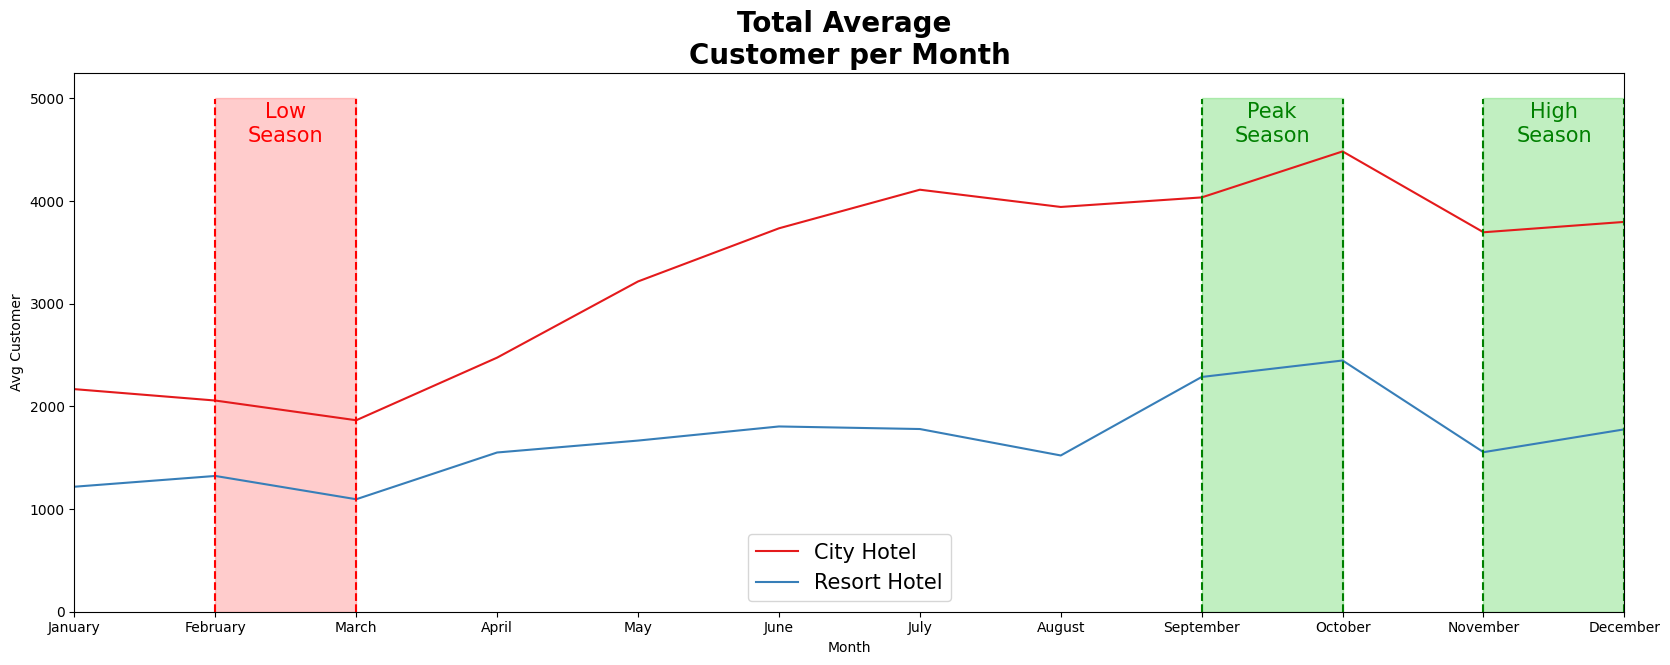

In [527]:
plt.figure(figsize=(20,7))
sns.lineplot(data = dfg, x = 'arrival_date_month', y = 'Total Customer', hue = 'hotel', palette='Set1')
plt.title('Total Average \nCustomer per Month', weight='bold', fontsize = 20)
plt.ylabel('Avg Customer')
plt.xlabel('Month')

plt.axvline(8, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.axvline(9, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.stackplot(np.arange(8,10), [5000], color='limegreen', alpha=0.3)
plt.text(x = 8.5, y = 4750, s = 'Peak\nSeason', va = 'center', ha = 'center', fontsize =15, color='green')

plt.axvline(10, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.axvline(11, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.stackplot(np.arange(10,12), [5000], color='limegreen', alpha=0.3)
plt.text(x = 10.5, y = 4750, s = 'High\nSeason', va = 'center', ha = 'center', fontsize =15, color='green')

plt.axvline(1, color='red', linestyle='--', ymax = 0.952, ymin = 0)
plt.axvline(2, color='red', linestyle='--', ymax = 0.952, ymin = 0)
plt.stackplot(np.arange(1,3), [5000], color='red', alpha=0.2)
plt.text(x = 1.5, y = 4750, s = 'Low\nSeason', va = 'center', ha = 'center', fontsize =15, color='red')

plt.xlim(0,11)
plt.legend(loc='best', fontsize =15)
plt.show()

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

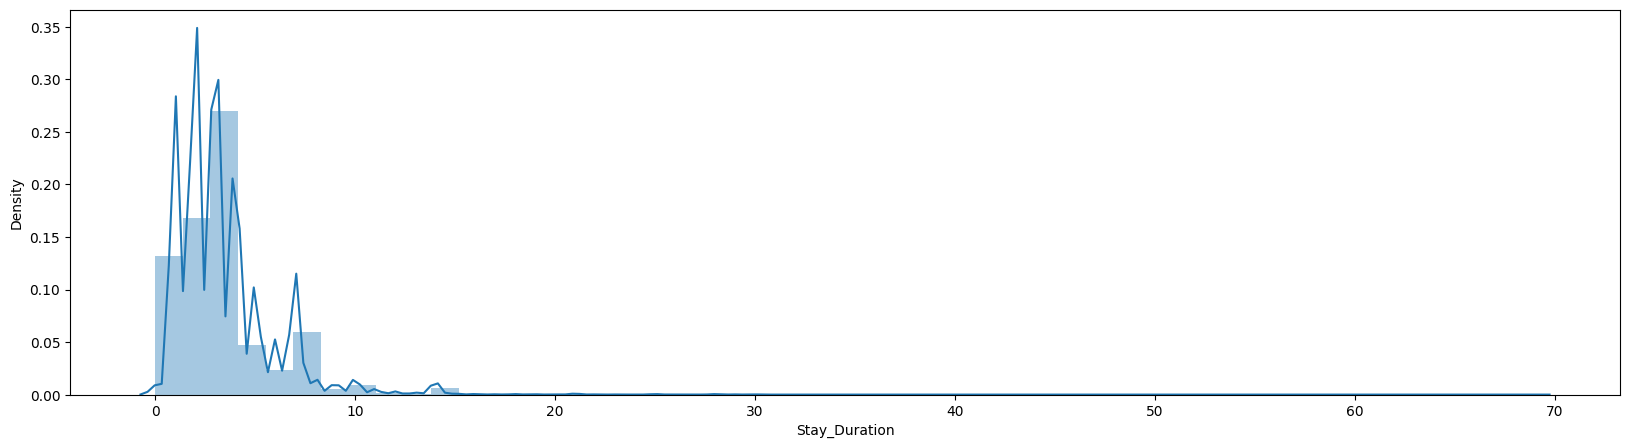

In [528]:
df['Stay_Duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
plt.figure(figsize=(20,5))
sns.distplot(df['Stay_Duration'])
plt.plot

In [529]:
df['Duration'] = df['Stay_Duration'].apply(lambda value: 'A days' if value < 3 else ('A weeks' if value < 7 else ('A months' if value < 30 else 'Several months')))

In [530]:
df['Duration'].value_counts()

Duration
A weeks           56054
A days            49282
A months          13840
Several months       34
Name: count, dtype: int64

In [531]:
dfg_cancel = df[df['is_canceled'] == 1].groupby(['hotel','Duration']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_aman = df[df['is_canceled'] == 0].groupby(['hotel','Duration']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_cancel['cancel_ratio'] = dfg_cancel['is_canceled'] / (dfg_cancel['is_canceled'] + dfg_aman['is_canceled']) * 100
dfg_cancel

,hotel,Duration,is_canceled,cancel_ratio
0,City Hotel,A days,14548,41.640667
1,City Hotel,A months,1473,45.156346
2,City Hotel,A weeks,17048,41.629224
3,City Hotel,Several months,10,83.333333
4,Resort Hotel,A days,2907,20.264901
5,Resort Hotel,A months,3358,31.745131
6,Resort Hotel,A weeks,4849,32.108330
7,Resort Hotel,Several months,6,27.272727


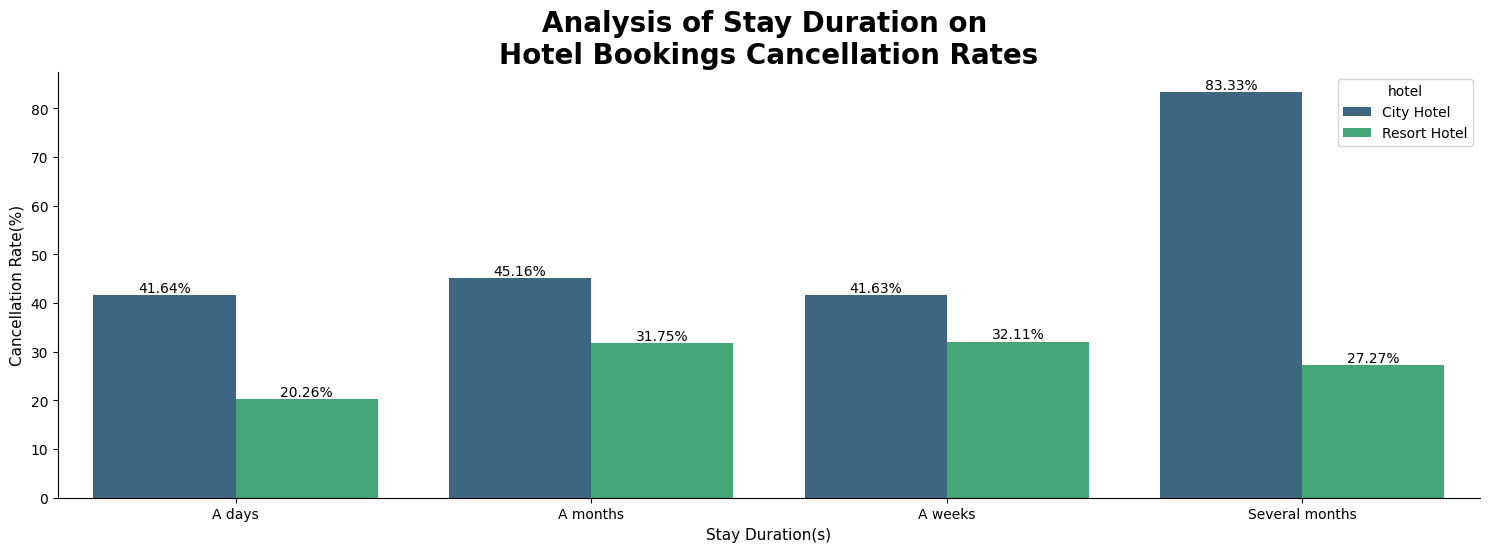

In [532]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Duration', y='cancel_ratio', hue='hotel', data=dfg_cancel, palette='viridis')

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

sns.despine()
plt.tight_layout()

# Menambahkan label pada setiap bar

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')
plt.title('Analysis of Stay Duration on \nHotel Bookings Cancellation Rates', weight='bold', fontsize = 20)
plt.show()


## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate


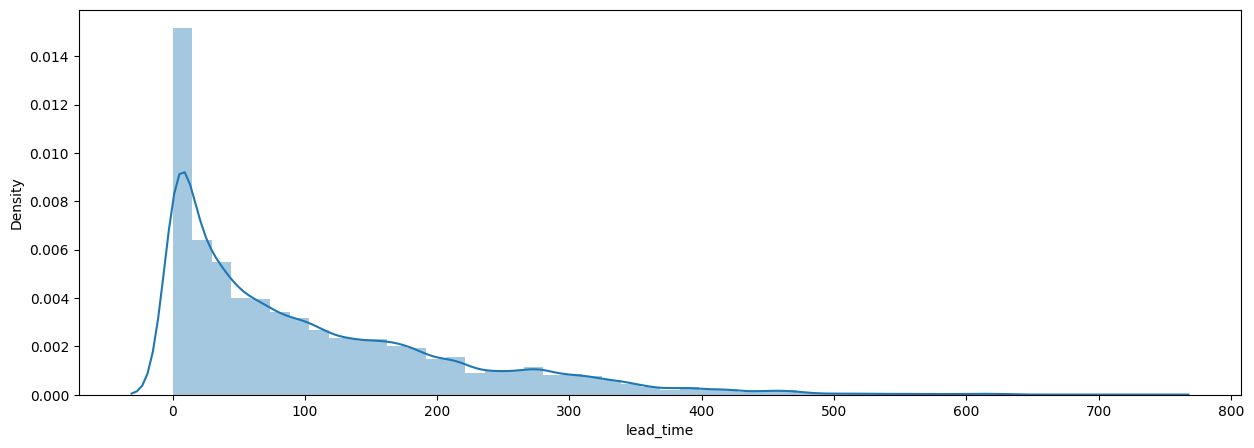

In [533]:
plt.figure(figsize=(15,5))
sns.distplot(df['lead_time'])
plt.show()

In [534]:
df['lead_time_group'] = df['lead_time'].apply(lambda value: 'A days' if value < 3 else ('A weeks' if value < 7 else ('A months' if value < 30 else ('Several months' if value < 180 else 'Several years'))))

In [535]:
dfg_cancel = df[df['is_canceled'] == 1].groupby(['hotel','lead_time_group']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_aman = df[df['is_canceled'] == 0].groupby(['hotel','lead_time_group']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_cancel['cancel_ratio'] = dfg_cancel['is_canceled'] / (dfg_cancel['is_canceled'] + dfg_aman['is_canceled']) * 100
dfg_cancel

,hotel,lead_time_group,is_canceled,cancel_ratio
0,City Hotel,A days,619,10.301215
1,City Hotel,A months,3813,29.645467
2,City Hotel,A weeks,568,14.423565
3,City Hotel,Several months,17141,43.710315
4,City Hotel,Several years,10938,63.819359
5,Resort Hotel,A days,329,5.706852
6,Resort Hotel,A months,1399,20.713651
7,Resort Hotel,A weeks,197,7.594449
8,Resort Hotel,Several months,5951,34.756454
9,Resort Hotel,Several years,3244,41.525858


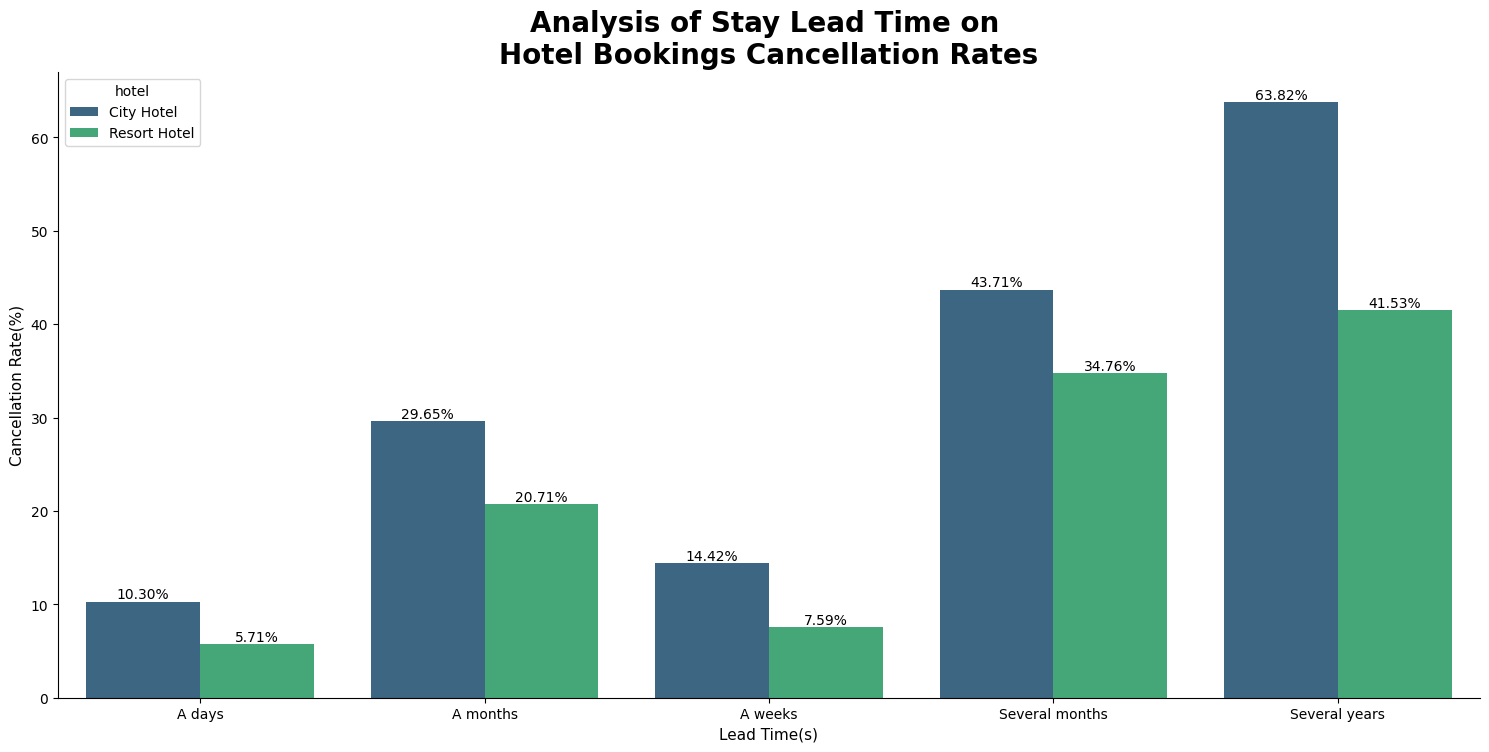

In [536]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='lead_time_group', y='cancel_ratio', hue='hotel', data=dfg_cancel, palette='viridis')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

sns.despine()
plt.tight_layout()

# Menambahkan label pada setiap bar

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')
plt.title('Analysis of Stay Lead Time on \nHotel Bookings Cancellation Rates', weight='bold', fontsize = 20)
plt.show()
